# U.S. Medical Insurance Costs (EDA)

In [1]:
### Portfolio project: US Medical Insurance Costs

# import libraries 
import pandas as pd
import matplotlib.pyplot as plt 
from IPython.display import display, HTML
import seaborn as sns

pd.set_option('display.max_colwidth', None)
sns.set_theme(style="whitegrid")
%matplotlib inline

In [2]:
## Create a master Dataframe out of `insurance.csv`
dataset = pd.read_csv('insurance.csv')

## First inspection of the Dataframe for missing values and duplicates
# display(HTML(dataset.head().to_html()))
print("The number of NaN values:")
print(dataset.isna().sum(),'\n')
print("The number of duplicates:")
print(dataset.duplicated().value_counts())

The number of NaN values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64 

The number of duplicates:
False    1337
True        1
dtype: int64


In [3]:
## Drop duplicates since these two rows are likely to belong to the same person
dataset.drop_duplicates(inplace=True)

## Check for duplicates again
print(dataset.duplicated().value_counts())

## Change column name
dataset = dataset.rename(columns={'smoker':'smoke_habit'})
display(HTML(dataset.head().to_html()))

False    1337
dtype: int64


,age,sex,bmi,children,smoke_habit,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


First, I'd like to take a look at the descriptive statistics of the whole `dataset`.

In [4]:
display(HTML(dataset.describe().to_html()))

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


According to the brief summary of descriptive statistics above,
- the number of observational units (patients) is 1337.
- the average of patients in the dataset is 39.
- the standard deviation of the age distribution is 14.
- the average medical insurance cost is 13,279 US dollars.
- the lowest medical insurance cost is 1,121.8 US dollars.
- the highest medical insurance cost is 63,770.4 US dollars.

__In this project, I plan to analyze the correlation between the__ `age`, `sex`, `bmi`, `smoker`, `region` __and the__ `charges`. __My ideas for analysis include:__
1. The averages in 4 different regions: `northeast` `northwest` `southeast` `southwest`
2. The difference in medical insurance cost between `smoker` and `non-smoker`
3. The `age` and `bmi` distribution and how they contribute to the increase of medical insurance cost

### Functions Collections

To save time, I plan to build a function to calculate the average of each attribute of patients.

In [5]:
## Create a function to calculate averages
def cal_average(dataset, group_column, cal_column):
    average_df = dataset.groupby(group_column)[cal_column].mean().reset_index()
    average_df[group_column] = average_df[group_column].str.title()
    return average_df

### Analysis 1: Average medical insurance cost by regions

In [6]:
## Check for unique regions in the dataset
regions = dataset.region.unique()
print(regions)

['southwest' 'southeast' 'northwest' 'northeast']


,Region,Number of patients,Medical Insurance Cost,BMI,Age,Children
0,Northeast,324,13406.384516,29.173503,39.268519,1.046296
1,Northwest,324,12450.840844,29.195494,39.259259,1.151235
2,Southeast,364,14735.411438,33.355989,38.939560,1.049451
3,Southwest,325,12346.937377,30.596615,39.455385,1.141538


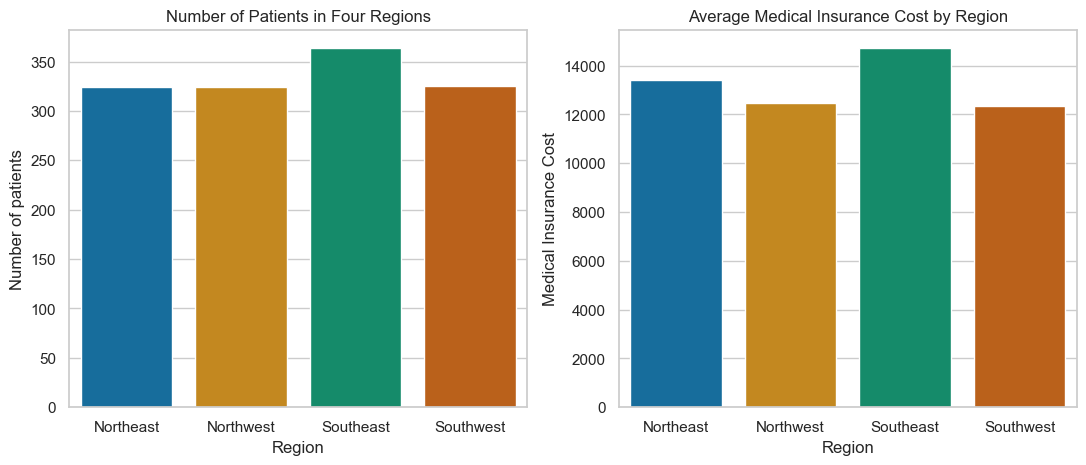

In [7]:
## Check for the number of patients in each region
region_pop = dataset.groupby('region').age.count().reset_index()
region_pop = region_pop.rename(columns={'age':'patient'})
region_pop.region = region_pop.region.str.title()
# display(HTML(region_pop.to_html()))

## Calculate the average medical insurance cost in each region
region_avg_cost = cal_average(dataset, 'region', 'charges')
region_avg_bmi = cal_average(dataset, 'region', 'bmi')
region_avg_age = cal_average(dataset, 'region', 'age')
region_avg_children = cal_average(dataset, 'region', 'children')

## Merge all dataframes for region
region_data = pd.merge(region_pop, region_avg_cost).merge(region_avg_bmi
                                                         ).merge(region_avg_age).merge(region_avg_children)
region_data.columns = ['Region', 'Number of patients','Medical Insurance Cost', 'BMI', 'Age', 'Children']
display(HTML(region_data.to_html()))

## Visualize averages by region
axs = plt.subplots(ncols=2,nrows=1,figsize=(13,5), dpi=100)
sns.barplot(x='Region', y='Number of patients', data=region_data, palette='colorblind', ax=axs[1][0]
           ).set_title('Number of Patients in Four Regions')
sns.barplot(x='Region', y='Medical Insurance Cost', data=region_data, palette='colorblind', ax=axs[1][1]
           ).set_title('Average Medical Insurance Cost by Region')
plt.show()

Based on the analyses above, I could conclude that the dataset is representative of the population since the number of patients in all regions is approximately 340 with the highest of 364 in the Southest and the lowest of 324 in the Northeast as well as Northwest. 

The average medical insurance cost in the Southeast is also the highest among all. Yet, the difference is not significant.

### Analysis 2: Smoker vs. Non-smoker

In [8]:
# Modify the values of `smoker`
dataset['smoke_habit'] = dataset.apply(lambda row: 'non-smoker' if row.smoke_habit == 'no' else 'smoker', axis=1)
# print(dataset.head())

,Smoking Habit,Number of patients,Medical Insurance Cost,BMI
0,Non-Smoker,1063,8440.660307,30.651853
1,Smoker,274,32050.231832,30.708449


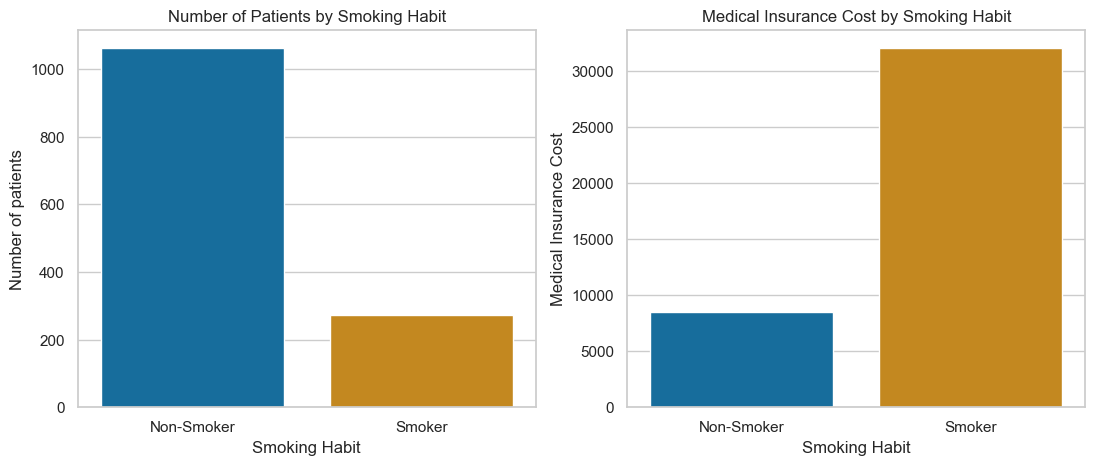

In [9]:
# Calculate the number of smokers and non-smokers
smoke_pop = dataset.groupby('smoke_habit').age.count().reset_index()
smoke_pop = smoke_pop.rename(columns={'age':'patient'})
smoke_pop.smoke_habit = smoke_pop.smoke_habit.str.title()

# Calculate the difference in average medical insurance cost between smokers & non-smokers
smoke_avg_cost = cal_average(dataset, 'smoke_habit', 'charges' )
smoke_avg_bmi = cal_average(dataset, 'smoke_habit', 'bmi' )

# Merge the DataFrames
smoke_data = pd.merge(smoke_pop, smoke_avg_cost).merge(smoke_avg_bmi)
smoke_data.columns = ['Smoking Habit','Number of patients', 'Medical Insurance Cost', 'BMI']
display(HTML(smoke_data.to_html()))

## The difference in medical insurance cost between smokers and non-smokers
axs = plt.subplots(ncols=2,nrows=1,figsize=(13,5), dpi=100)
sns.barplot(x='Smoking Habit', y='Number of patients', data=smoke_data, palette='colorblind', ax=axs[1][0]
           ).set_title('Number of Patients by Smoking Habit')
sns.barplot(x='Smoking Habit', y='Medical Insurance Cost', data=smoke_data, palette='colorblind'
           ).set_title('Medical Insurance Cost by Smoking Habit')
plt.show()

The two bar charts above illustrate the difference between the number of smokers and non-smokers as well as the difference in average medical insurance cost for each group.  Based on the analysis, smokers seem to incur a noticeably higher cost, which is approximately 32,050.2 dollars compared to that the non-smokers incure, which is under 10,000.

Smoking habit could be considered one of the factors that contribute most to the increase of medical insurance cost.

### Analysis 3: Age and BMI

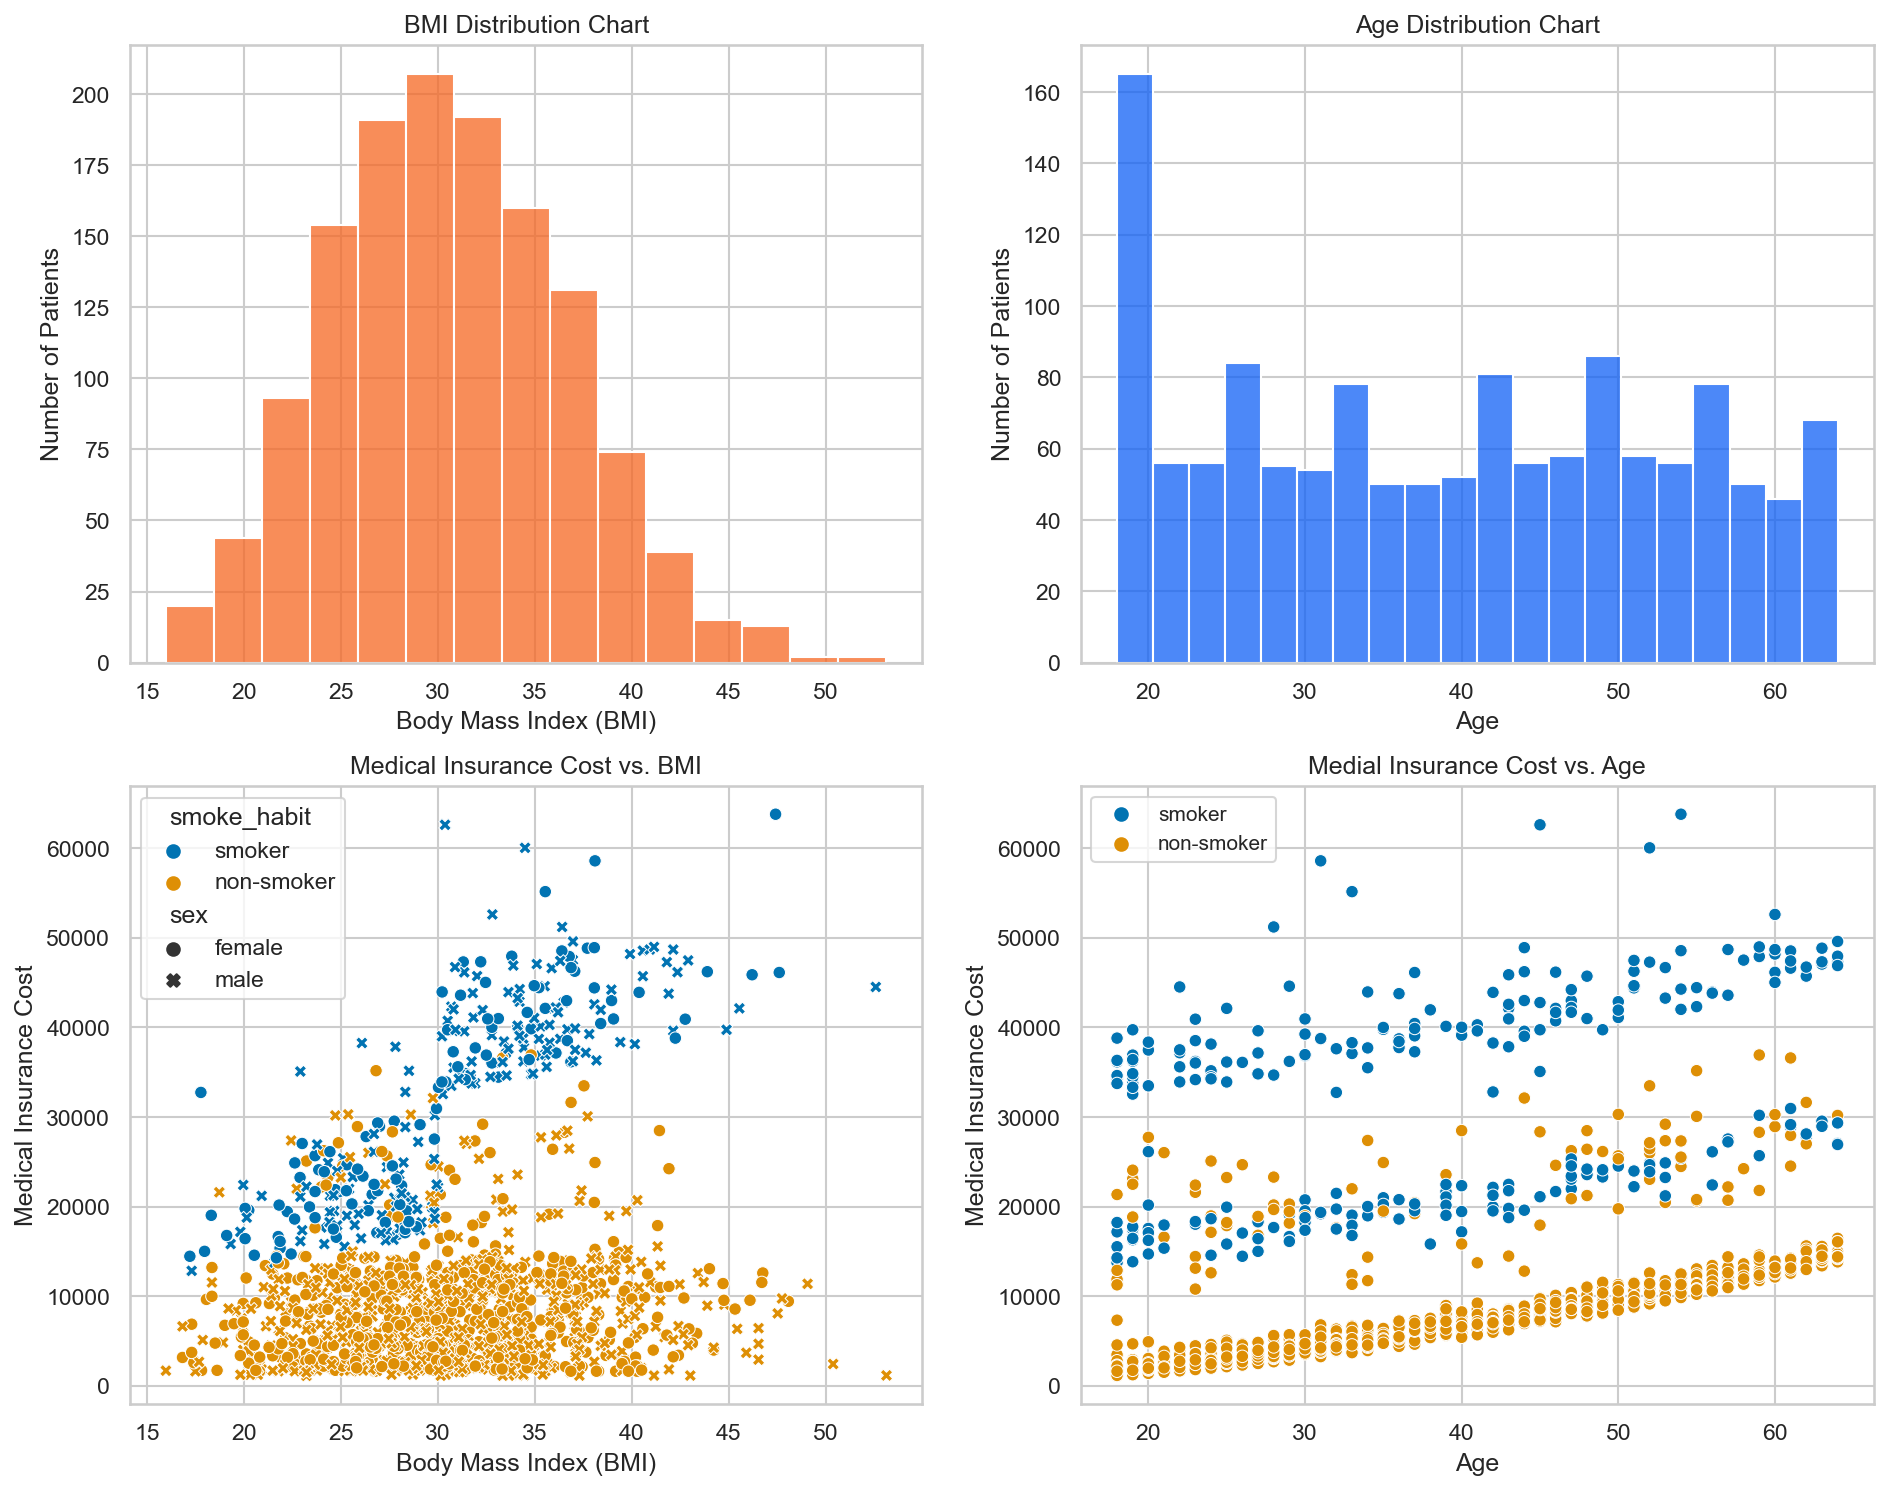

In [10]:
fig, axs = plt.subplots(ncols=2,nrows=2,figsize=(15,12), dpi=150)

## Age and BMI distribution 
sns.histplot(data=dataset.age, color='#1060F6', bins=20, ax=axs[0][1]
            ).set(xlabel='Age',ylabel='Number of Patients',title='Age Distribution Chart')
sns.histplot(dataset.bmi, color='#F66722', bins=15, ax=axs[0][0]
            ).set(xlabel='Body Mass Index (BMI)',ylabel='Number of Patients',title='BMI Distribution Chart')
plt.cla()
## Scatter plot for medical insurance cost and BMI
sns.scatterplot(data=dataset, x='bmi', y='charges', hue='smoke_habit',style='sex', palette='colorblind', ax=axs[1][0]
               ).set(xlabel='Body Mass Index (BMI)',ylabel='Medical Insurance Cost',
                     title='Medical Insurance Cost vs. BMI')

## Scatter plot for medical insurance cost and age
sns.scatterplot(data=dataset, x='age',y='charges', hue='smoke_habit', ax=axs[1][1],
                palette='colorblind').set(xlabel='Age',ylabel='Medical Insurance Cost',
                                          title='Medial Insurance Cost vs. Age')
plt.legend(title='', fontsize='medium', loc='upper left')
plt.show()

Looking at the "Age Distribution Chart", you can see that the histogram is quite close to symmetric except for the group of patients who are younger than 20 years old. This group of people account for roughly 12% of the dataset. 

The scatterplot "Medical Insurance Cost vs. BMI" provides us with an interesting insight into the data. For non-smokers, their BMI doesn't seem to be a contributing factor to the medical insurance charges. However, smokers can incur much higher insurance cost if their BMI is higher than 30. 

Also in this scatterplot, sex seemingly plays no role in increasing the medical insurance charges.  

The scatterplot "Medical Insurance Cost vs. Age" reveals a positive relationship betwen age and medical insurance cost. As the age increases, the cost is likely to increase. However, it would be reckless to assert that there's a cause-and-effect relationship between the two. 

### Analysis 4: The correlation coefficient 

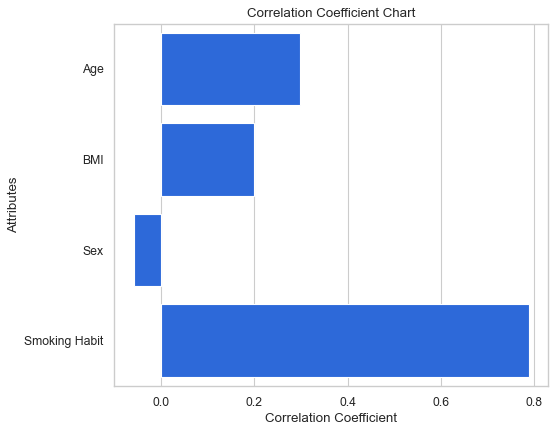

In [11]:
# Convert the string values into integer values
dataset['sex'] = dataset.apply(lambda row: 1 if row['sex'] == "male" else 2, axis=1)
dataset['smoke_habit'] = dataset.apply(lambda row: 0 if row['smoke_habit'] == 'non-smoker' else 1, axis=1)

# Calculate the correlation coefficient of each variable with the insurance charges
age_charges_corr = dataset.age.corr(dataset.charges)
bmi_charges_corr = dataset.bmi.corr(dataset.charges)
sex_charges_corr = dataset.sex.corr(dataset.charges)
smoke_charges_corr = dataset.smoke_habit.corr(dataset.charges)

# Create a DataFrame that holds all correlation coeffiecient data
corr_data = pd.DataFrame({
    'Attributes':['Age', 'BMI', 'Sex', 'Smoking Habit'],
    'Correlation Coefficient':[age_charges_corr, bmi_charges_corr, sex_charges_corr, smoke_charges_corr]})
# display(HTML(corr_data.to_html()))

# Draw a bar chart to illustrate the correlation coefficient
axs = plt.subplots(ncols=1,nrows=1,figsize=(7,6), dpi=80)
sns.barplot(x='Correlation Coefficient', y='Attributes', data=corr_data, color='#1060F6'
           ).set_title('Correlation Coefficient Chart')
plt.show()

The chart above reconfirms my statement that a patient's smoking habit is the largest contributing factor to the increase in medical insurance charges. 